In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 9]

In [42]:
centers = np.array([[-2,3], [2,7], [3,1]])

In [43]:
centers = centers.T

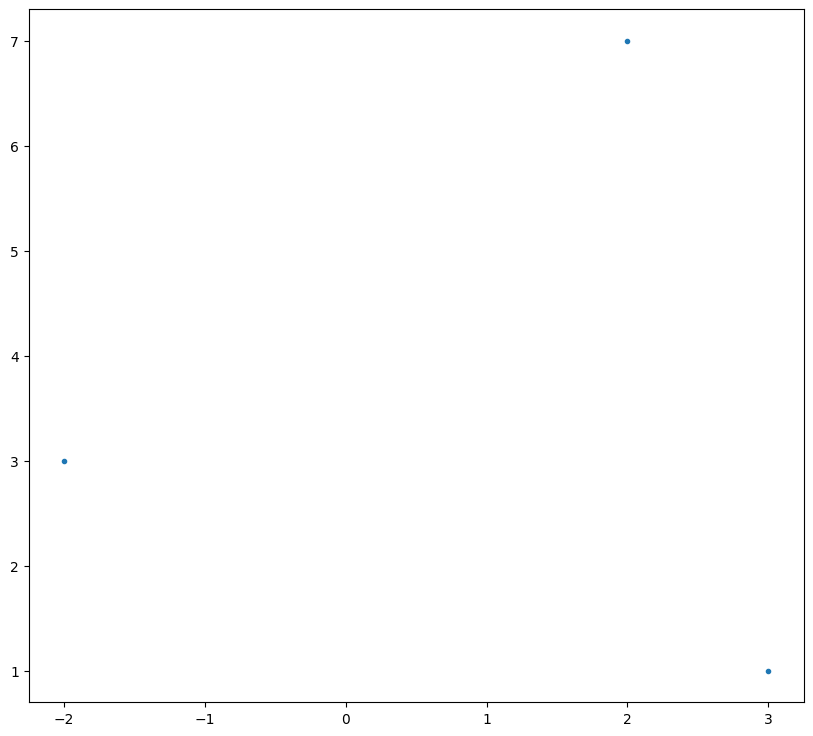

In [44]:
plt.plot(centers[0], centers[1], '.')

In [45]:
cov1 = np.array([[2, 1], [1, 2]])
cov2 = np.array([[2, 1], [1, 2]])
cov3 = np.array([[2, 1], [1, 2]])

In [46]:
a = np.random.multivariate_normal(centers[:, 0], cov1, size=400)
b = np.random.multivariate_normal(centers[:, 1], cov2, size=400)
c = np.random.multivariate_normal(centers[:, 2], cov3, size=400)

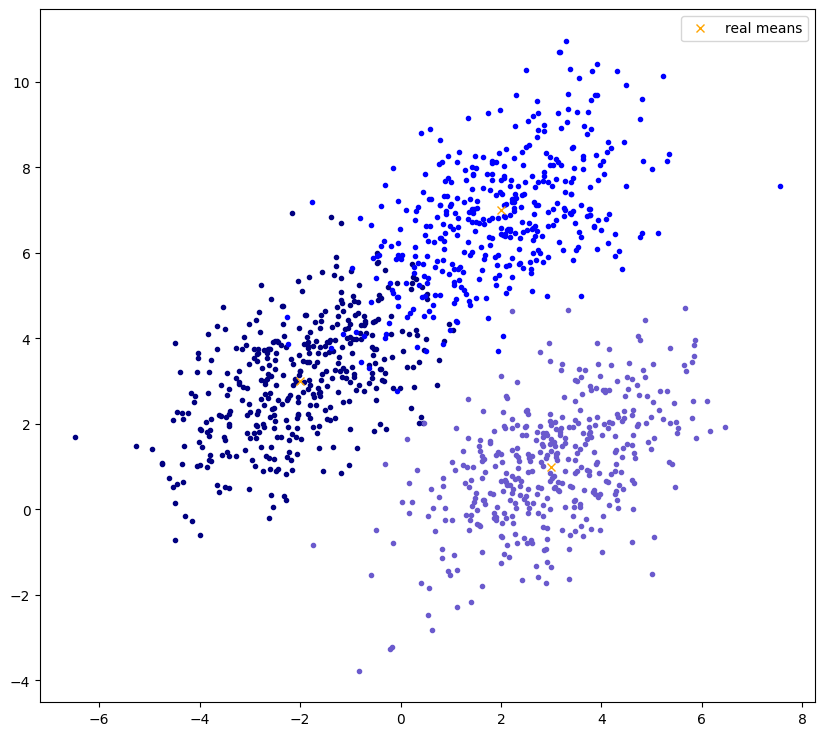

In [47]:
plt.plot(a[:, 0], a[:, 1], '.', color='navy')
plt.plot(b[:, 0], b[:, 1], '.', color='blue')
plt.plot(c[:, 0], c[:, 1], '.', color='slateblue')
plt.plot(centers[0], centers[1], 'x', color='orange', label='real means')
plt.legend()

# Zero step

In [48]:
points = np.concatenate([a, b, c])

In [49]:
limits = np.concatenate([np.max(points, axis=0), np.min(points, axis=0)], axis=0).reshape((2,2))
limits

array([[ 7.55542735, 10.96409889],
       [-6.47676705, -3.77400957]])

In [50]:
x_step = (limits[0,0] - limits[1,0]) / 4 
y_step = (limits[0,1] - limits[1,1]) / 4

In [51]:
limits[1,1] + y_step, limits[1,0] + 2*y_step, limits[1,0] + 3*y_step

(-0.08948245233840879, 0.8922871802771892, 4.576814294126023)

In [52]:
candidates = np.array([[limits[1,0] + x_step, limits[1,0] + 2*x_step, limits[1,0] + 3*x_step],
                       [limits[1,1] + y_step, limits[1,1] + 2*y_step, limits[1,1] + 3*y_step]])

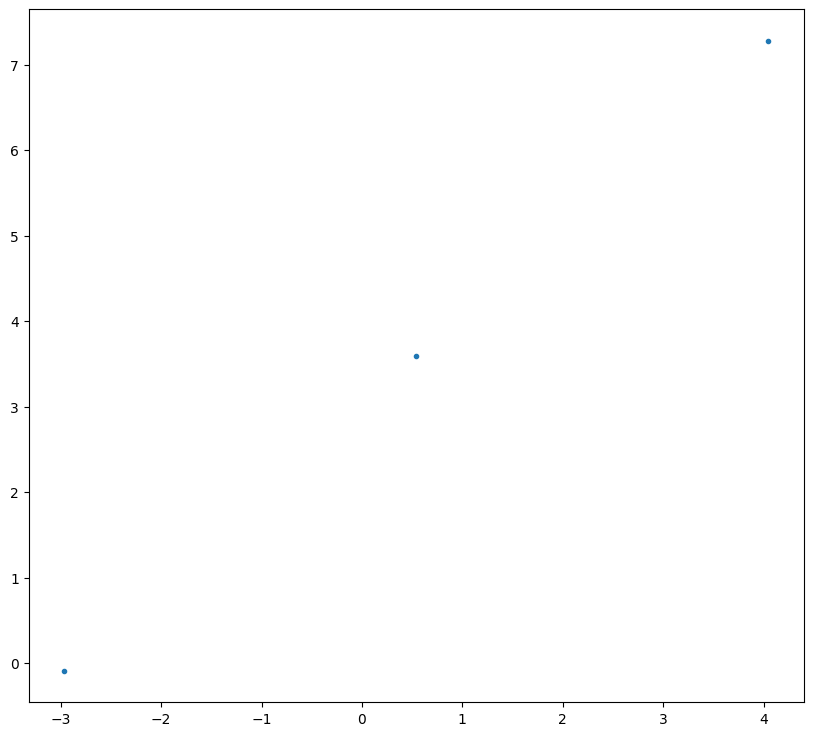

In [53]:
plt.plot(candidates[0], candidates[1], '.')

In [54]:
candidates = candidates.T

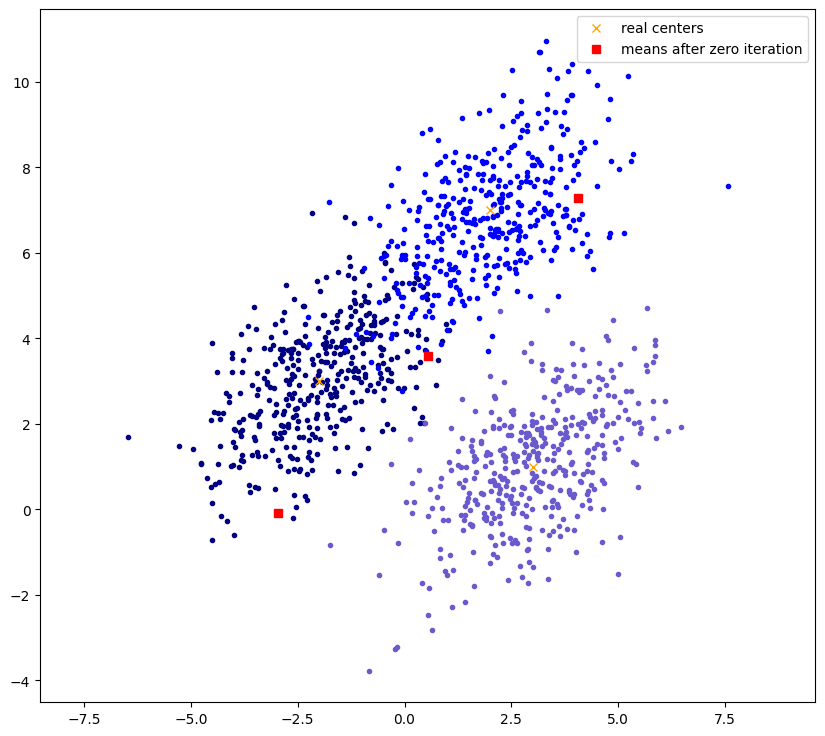

In [55]:
plt.plot(a[:, 0], a[:, 1], '.', color='navy')
plt.plot(b[:, 0], b[:, 1], '.', color='blue')
plt.plot(c[:, 0], c[:, 1], '.', color='slateblue')
plt.plot(centers[0], centers[1], 'x', color='orange', label='real centers')
plt.plot(candidates[:, 0], candidates[:, 1], 's', color='red', label='means after zero iteration')

plt.axis('equal')
plt.legend()

Text(0.5, 1.0, 'Zero step')

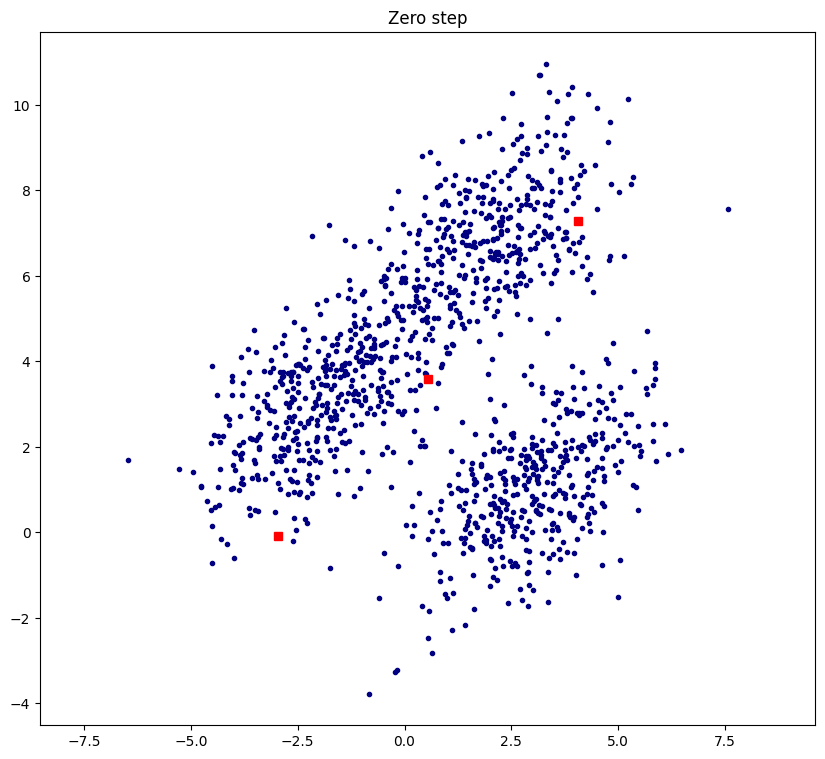

In [56]:
plt.plot(points[:, 0], points[:, 1], '.', color='navy')
plt.plot(candidates[:, 0], candidates[:,1], 's', color='red')
plt.axis('equal')

plt.title('Zero step')

In [57]:
dist_list = []

for p in points:

    distances = {np.linalg.norm(p - candidates[0]):'1', np.linalg.norm(p - candidates[1]):'2', np.linalg.norm(p - candidates[2]):'3'}
    
    dist_list.append({'p_coordinates':p, 'group':distances.get(min(distances.keys()))})

In [58]:
group_a = np.array([p['p_coordinates'] for p in dist_list if p['group'] == '1'])
group_b = np.array([p['p_coordinates'] for p in dist_list if p['group'] == '2'])
group_c = np.array([p['p_coordinates'] for p in dist_list if p['group'] == '3'])

Text(0.5, 1.0, 'Zero step')

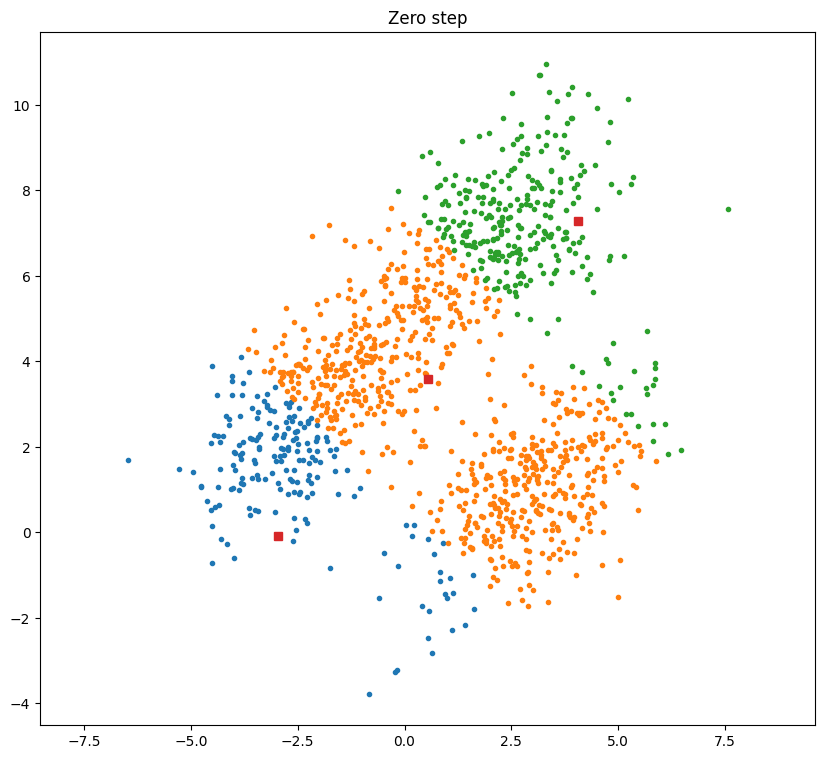

In [59]:
plt.plot(group_a[:, 0], group_a[:, 1], '.')
plt.plot(group_b[:, 0], group_b[:, 1], '.')
plt.plot(group_c[:, 0], group_c[:, 1], '.')
plt.plot(candidates[:, 0], candidates[:, 1], 's')
plt.axis('equal')

plt.title('Zero step')

# Step one

In [60]:
centroids_1 = np.array([np.mean(group_a, axis=0), np.mean(group_b, axis=0), np.mean(group_c, axis=0)])
centroids_1

array([[-2.6286921 ,  1.36080663],
       [ 1.12777927,  2.77202058],
       [ 2.86738574,  7.12683217]])

Text(0.5, 1.0, 'Step one')

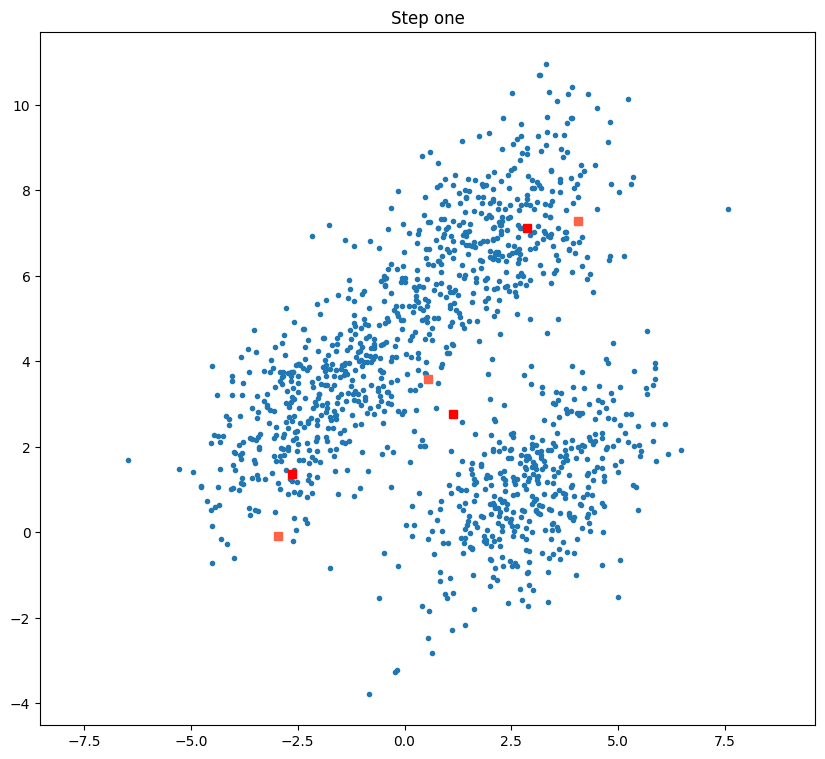

In [61]:
plt.plot(points[:, 0], points[:, 1], '.')
plt.plot(candidates[:, 0], candidates[:, 1], 's', color='tomato')
plt.plot(centroids_1[:, 0], centroids_1[:, 1], 's', color='red')
plt.axis('equal')

plt.title('Step one')

In [62]:
dist_list_1 = []

for p in points:

    distances = {np.linalg.norm(p - centroids_1[0]):'1', np.linalg.norm(p - centroids_1[1]):'2', np.linalg.norm(p - centroids_1[2]):'3'}
    
    dist_list_1.append({'p_coordinates':p, 'group':distances.get(min(distances.keys()))})

In [63]:
 centroids_1

array([[-2.6286921 ,  1.36080663],
       [ 1.12777927,  2.77202058],
       [ 2.86738574,  7.12683217]])

In [64]:
group_a_1 = np.array([p['p_coordinates'] for p in dist_list_1 if p['group'] == '1'])
group_b_1 = np.array([p['p_coordinates'] for p in dist_list_1 if p['group'] == '2'])
group_c_1 = np.array([p['p_coordinates'] for p in dist_list_1 if p['group'] == '3'])

(-7.178376767442309, 8.25703707303798, -4.510914988957009, 11.701004311977858)

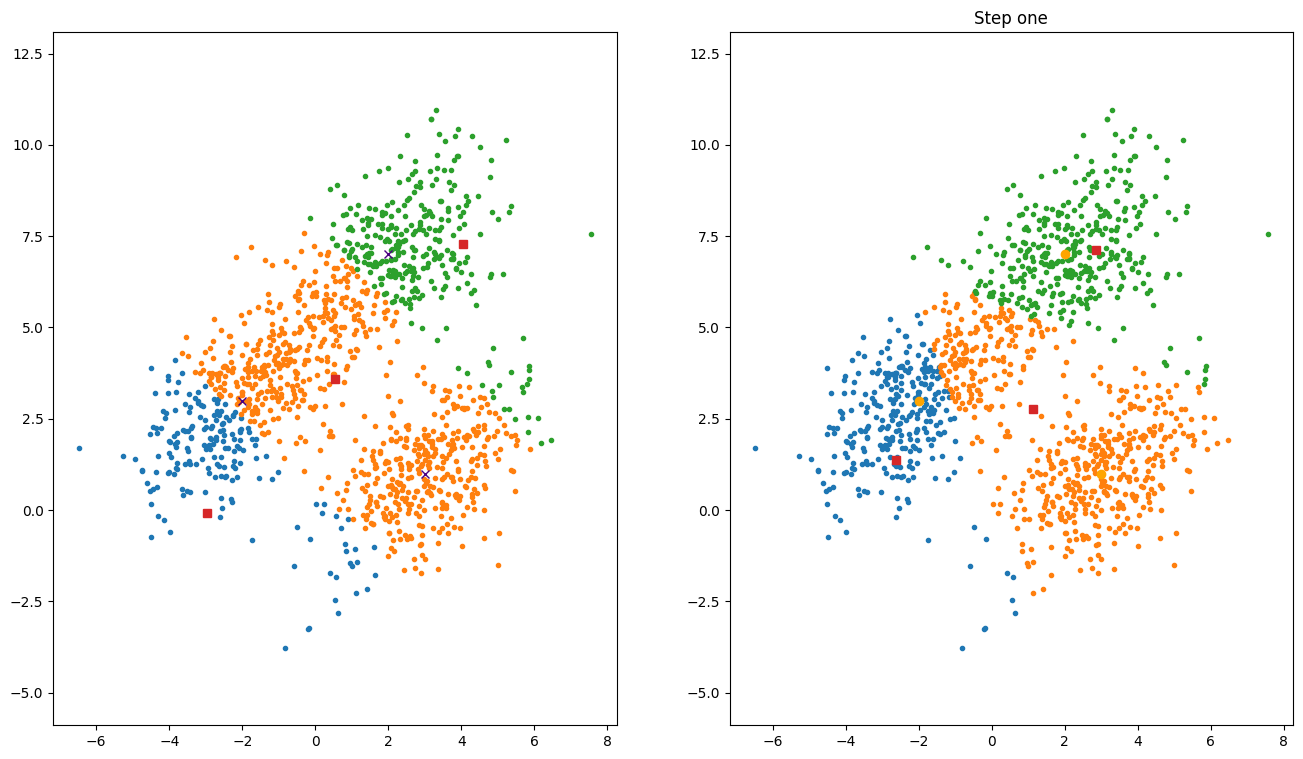

In [65]:
plt.rcParams["figure.figsize"] = [16,9]

fig, (ax1, ax2) = plt.subplots(1,2)

plt.title('Step one')

ax1.plot(group_a[:, 0], group_a[:, 1], '.')
ax1.plot(group_b[:, 0], group_b[:, 1], '.')
ax1.plot(group_c[:, 0], group_c[:, 1], '.')
ax1.plot(candidates[:, 0], candidates[:, 1], 's')
ax1.plot(centers[0], centers[1], 'x', color='indigo')
ax1.axis('equal')


ax2.plot(group_a_1[:, 0], group_a_1[:, 1], '.')
ax2.plot(group_b_1[:, 0], group_b_1[:, 1], '.')
ax2.plot(group_c_1[:, 0], group_c_1[:, 1], '.')
ax2.plot(centroids_1[:, 0], centroids_1[:, 1], 's')
ax2.plot(centers[0], centers[1], 'o', color='orange')
ax2.axis('equal')

In [66]:
def get_intersection(x,y):
    a = set((tuple(i) for i in x))
    b = set((tuple(i) for i in y))

    return np.array(list(a.intersection(b)))

In [67]:
xora1 = get_intersection(group_a, group_b_1)
xora2 = get_intersection(group_b, group_a_1)
xora3 = get_intersection(group_b, group_c_1)
xora4 = get_intersection(group_c, group_b_1)

(-7.178376767442309, 8.25703707303798, -4.510914988957009, 11.701004311977858)

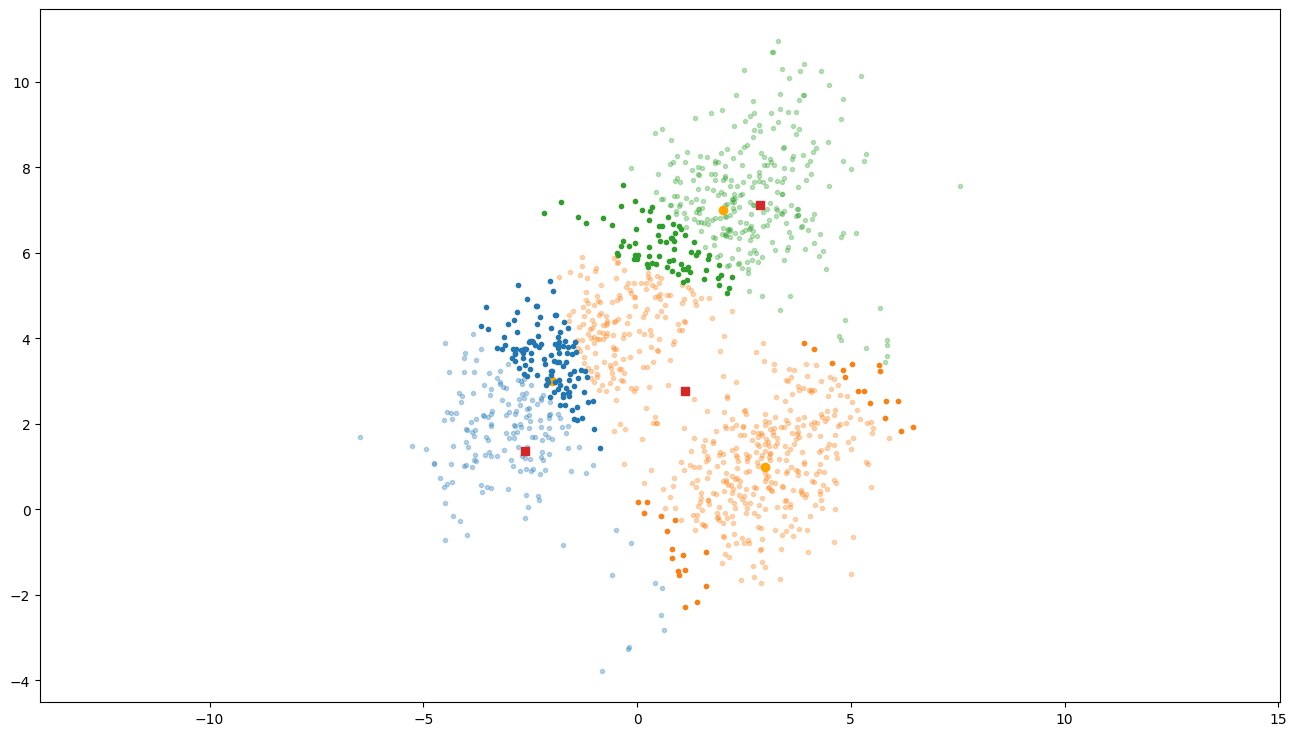

In [68]:
plt.plot(group_a[:, 0], group_a[:, 1], '.', alpha=0.3)
plt.plot(group_b[:, 0], group_b[:, 1], '.', alpha=0.3)
plt.plot(group_c[:, 0], group_c[:, 1], '.', alpha=0.3)
plt.plot(centroids_1[:, 0], centroids_1[:, 1], 's')
plt.plot(centers[0], centers[1], 'o', color='orange')


plt.plot(xora1[:, 0], xora1[:, 1], '.', color='#ff7f0e')
plt.plot(xora2[:, 0], xora2[:, 1], '.', color='#1f77b4')
plt.plot(xora3[:, 0], xora3[:, 1], '.', color='#2ca02c')
plt.plot(xora4[:, 0], xora4[:, 1], '.', color='#ff7f0e')




plt.axis('equal')

# Step two

In [69]:
centroids_2 = np.array([np.mean(group_a_1, axis=0), np.mean(group_b_1, axis=0), np.mean(group_c_1, axis=0)])
centroids_2

array([[-2.61462045,  2.35211245],
       [ 1.96184718,  2.07964737],
       [ 2.28914352,  7.11239858]])

Text(0.5, 1.0, 'Step two')

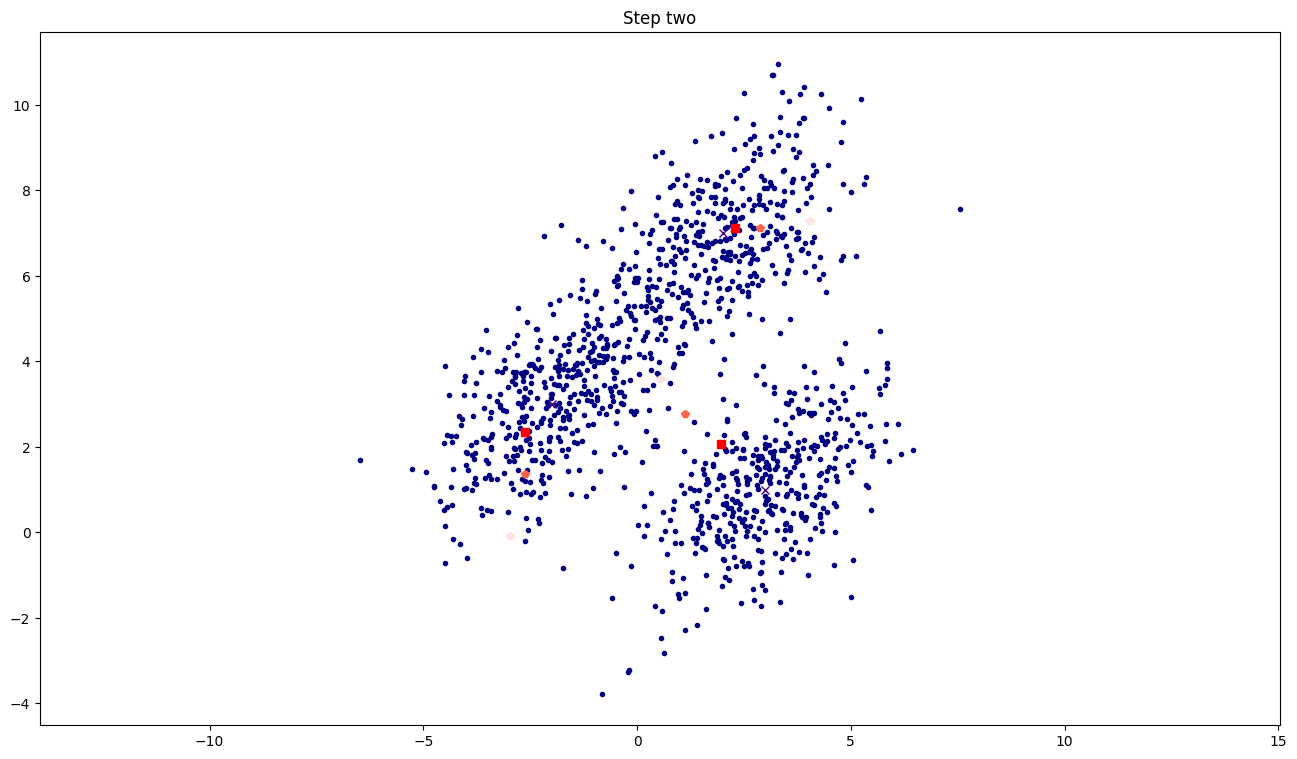

In [70]:
plt.plot(points[:, 0], points[:, 1], '.', color='navy')
plt.plot(candidates[:, 0], candidates[:, 1], 'p', color='mistyrose')
plt.plot(centroids_1[:, 0], centroids_1[:, 1], 'p', color='tomato')
plt.plot(centroids_2[:, 0], centroids_2[:, 1], 's', color='red')
plt.plot(centers[0], centers[1], 'x', color='indigo')
plt.axis('equal')

plt.title('Step two')

In [71]:
dist_list_2 = []

for p in points:

    distances = {np.linalg.norm(p - centroids_2[0]):'1', np.linalg.norm(p - centroids_2[1]):'2', np.linalg.norm(p - centroids_2[2]):'3'}
    
    dist_list_2.append({'p_coordinates':p, 'group':distances.get(min(distances.keys()))})

In [72]:
group_a_2 = np.array([p['p_coordinates'] for p in dist_list_2 if p['group'] == '1'])
group_b_2 = np.array([p['p_coordinates'] for p in dist_list_2 if p['group'] == '2'])
group_c_2 = np.array([p['p_coordinates'] for p in dist_list_2 if p['group'] == '3'])

(-7.178376767442309, 8.25703707303798, -4.510914988957009, 11.701004311977858)

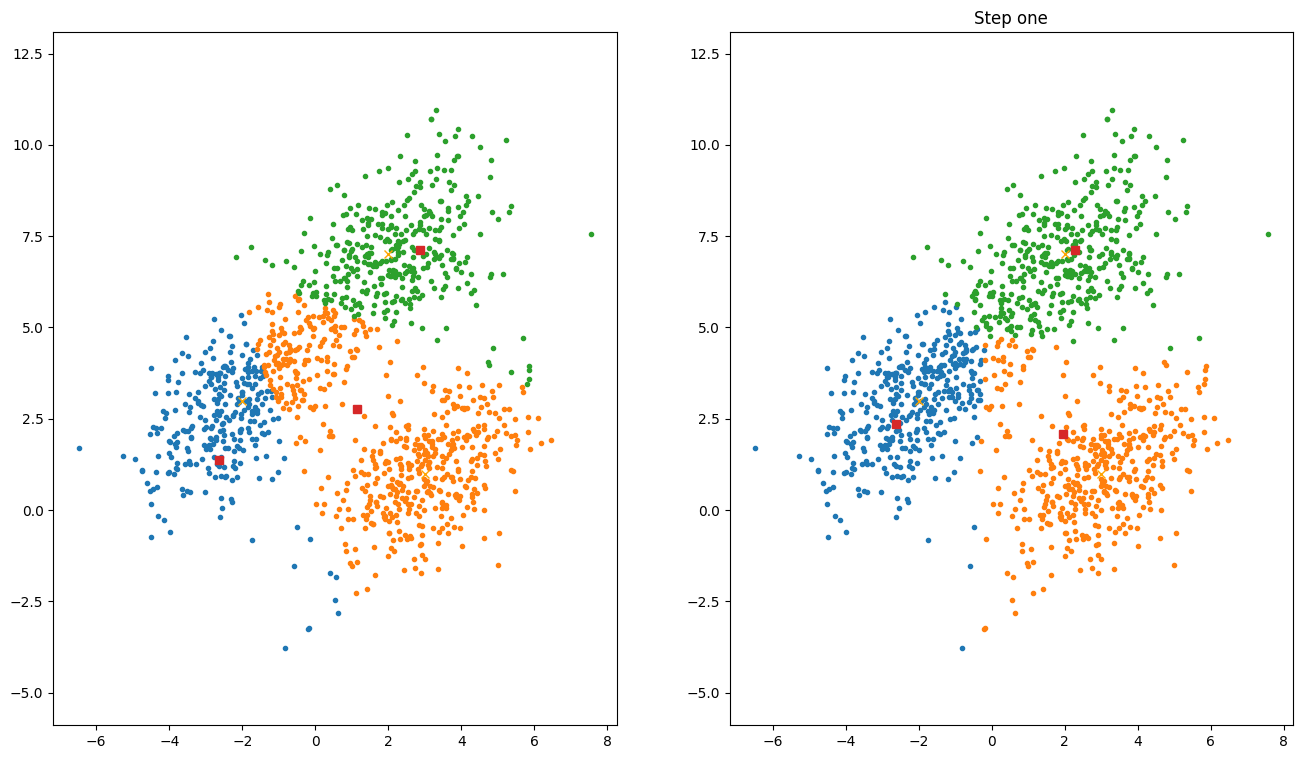

In [73]:
plt.rcParams["figure.figsize"] = [16,9]

fig, (ax1, ax2) = plt.subplots(1,2)

plt.title('Step one')

ax1.plot(group_a_1[:, 0], group_a_1[:, 1], '.')
ax1.plot(group_b_1[:, 0], group_b_1[:, 1], '.')
ax1.plot(group_c_1[:, 0], group_c_1[:, 1], '.')
ax1.plot(centroids_1[:, 0], centroids_1[:, 1], 's')
ax1.plot(centers[0], centers[1], 'x', color='orange')
ax1.axis('equal')


ax2.plot(group_a_2[:, 0], group_a_2[:, 1], '.')
ax2.plot(group_b_2[:, 0], group_b_2[:, 1], '.')
ax2.plot(group_c_2[:, 0], group_c_2[:, 1], '.')
ax2.plot(centroids_2[:, 0], centroids_2[:, 1], 's')
ax2.plot(centers[0], centers[1], 'x', color='orange')
ax2.axis('equal')

In [74]:
xora1 = get_intersection(group_a_1, group_b_2)
xora2 = get_intersection(group_b_1, group_a_2)
xora3 = get_intersection(group_b_1, group_c_2)
xora4 = get_intersection(group_c_1, group_b_2)

(-7.178376767442309, 8.25703707303798, -4.510914988957009, 11.701004311977858)

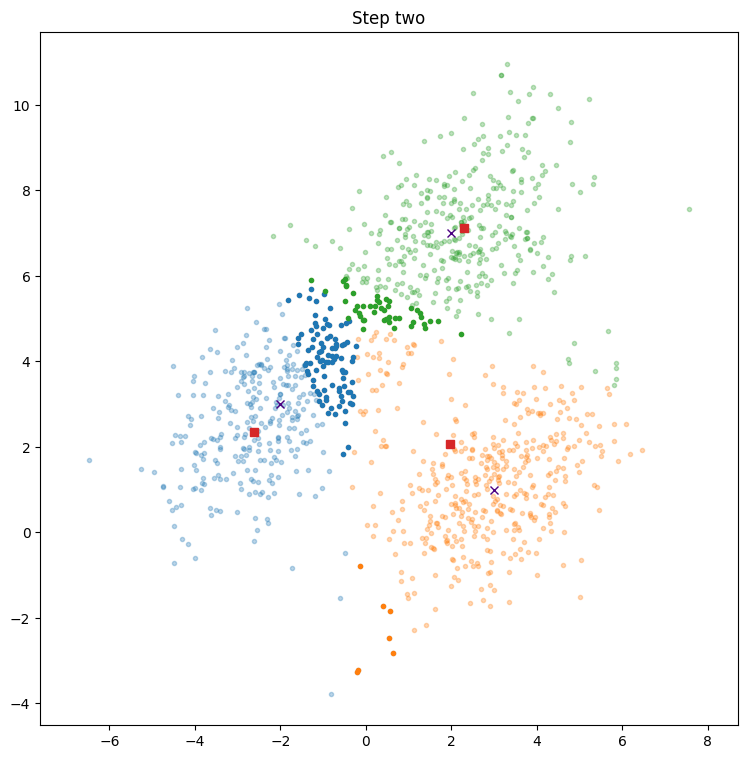

In [75]:
plt.figure(figsize=(9, 9))

plt.plot(group_a_1[:, 0], group_a_1[:, 1], '.', alpha=0.3)
plt.plot(group_b_1[:, 0], group_b_1[:, 1], '.', alpha=0.3)
plt.plot(group_c_1[:, 0], group_c_1[:, 1], '.', alpha=0.3)
plt.plot(centroids_2[:, 0], centroids_2[:, 1], 's')
plt.plot(centers[0], centers[1], 'x', color='indigo')


plt.plot(xora1[:, 0], xora1[:, 1], '.', color='#ff7f0e')
plt.plot(xora2[:, 0], xora2[:, 1], '.', color='#1f77b4')
plt.plot(xora3[:, 0], xora3[:, 1], '.', color='#2ca02c')
#plt.plot(xora4[:, 0], xora4[:, 1], '.', color='#ff7f0e')

plt.title('Step two')
plt.axis('equal')

# Step 3

In [76]:
centroids_3 = np.array([np.mean(group_a_2, axis=0), np.mean(group_b_2, axis=0), np.mean(group_c_2, axis=0)])
centroids_3

array([[-2.22861796,  2.85976339],
       [ 2.7755281 ,  1.28709648],
       [ 2.00824146,  6.94947915]])

Text(0.5, 1.0, 'Step two')

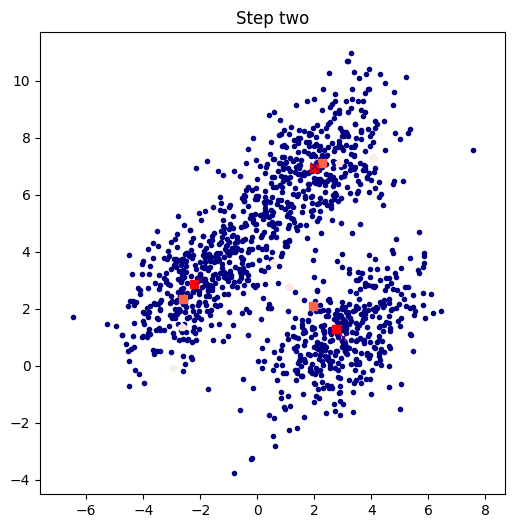

In [77]:
plt.figure(figsize=(6, 6))

plt.plot(points[:, 0], points[:, 1], '.', color='navy')
plt.plot(candidates[:, 0], candidates[:, 1], 'p', color='linen')
plt.plot(centroids_1[:, 0], centroids_1[:, 1], 'p', color='mistyrose')
plt.plot(centroids_2[:, 0], centroids_2[:, 1], 's', color='tomato')
plt.plot(centroids_3[:, 0], centroids_3[:, 1], 's', color='red')
plt.plot(centers[0], centers[1], 'x', color='indigo')
plt.axis('equal')

plt.title('Step two')

In [78]:
dist_list_3 = []

for p in points:

    distances = {np.linalg.norm(p - centroids_3[0]):'1', np.linalg.norm(p - centroids_3[1]):'2', np.linalg.norm(p - centroids_3[2]):'3'}
    
    dist_list_3.append({'p_coordinates':p, 'group':distances.get(min(distances.keys()))})

In [79]:
group_a_3 = np.array([p['p_coordinates'] for p in dist_list_3 if p['group'] == '1'])
group_b_3 = np.array([p['p_coordinates'] for p in dist_list_3 if p['group'] == '2'])
group_c_3 = np.array([p['p_coordinates'] for p in dist_list_3 if p['group'] == '3'])

(-7.178376767442309, 8.25703707303798, -4.510914988957009, 11.701004311977858)

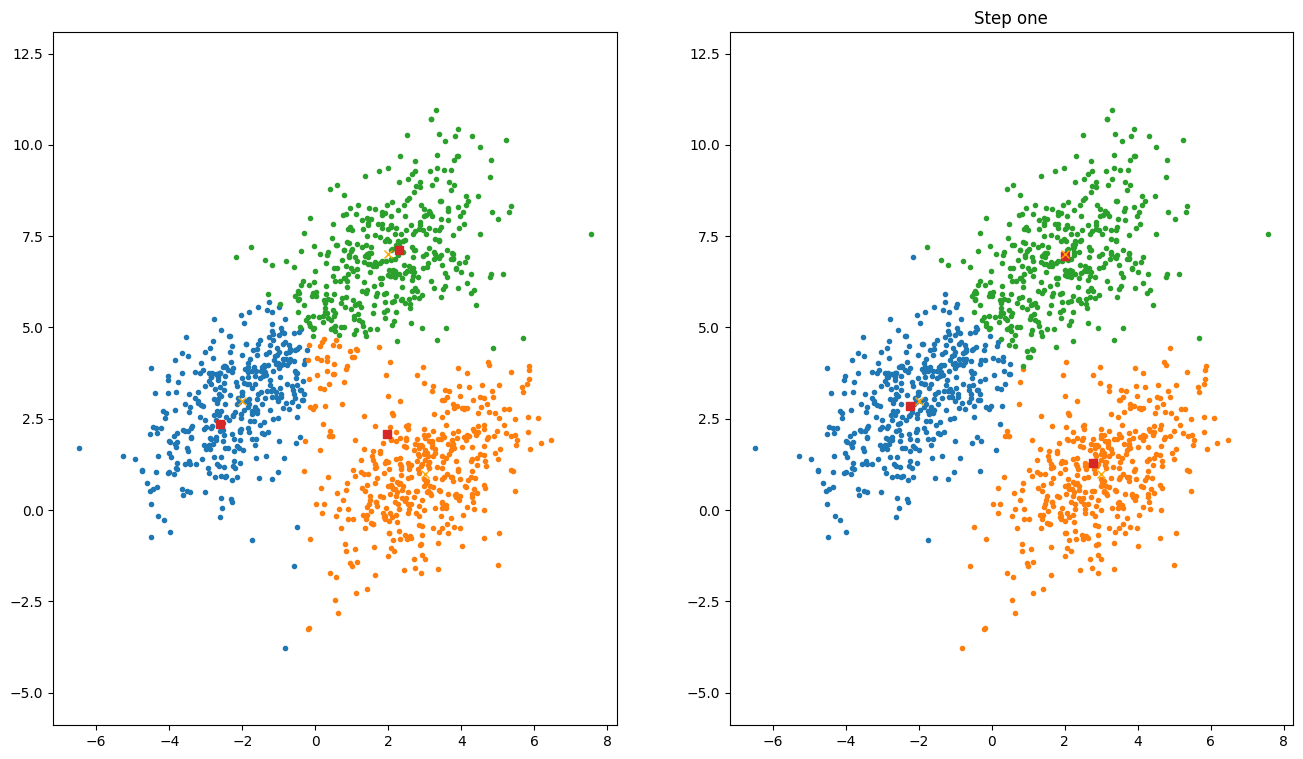

In [80]:
plt.rcParams["figure.figsize"] = [16,9]

fig, (ax1, ax2) = plt.subplots(1,2)

plt.title('Step one')

ax1.plot(group_a_2[:, 0], group_a_2[:, 1], '.')
ax1.plot(group_b_2[:, 0], group_b_2[:, 1], '.')
ax1.plot(group_c_2[:, 0], group_c_2[:, 1], '.')
ax1.plot(centroids_2[:, 0], centroids_2[:, 1], 's')
ax1.plot(centers[0], centers[1], 'x', color='orange')
ax1.axis('equal')


ax2.plot(group_a_3[:, 0], group_a_3[:, 1], '.')
ax2.plot(group_b_3[:, 0], group_b_3[:, 1], '.')
ax2.plot(group_c_3[:, 0], group_c_3[:, 1], '.')
ax2.plot(centroids_3[:, 0], centroids_3[:, 1], 's')
ax2.plot(centers[0], centers[1], 'x', color='orange')
ax2.axis('equal')

In [81]:
xora1 = get_intersection(group_a_2, group_b_3)
xora2 = get_intersection(group_b_2, group_a_3)
xora3 = get_intersection(group_b_2, group_c_3)
xora4 = get_intersection(group_c_2, group_b_3)

(-7.178376767442309, 8.25703707303798, -4.510914988957009, 11.701004311977858)

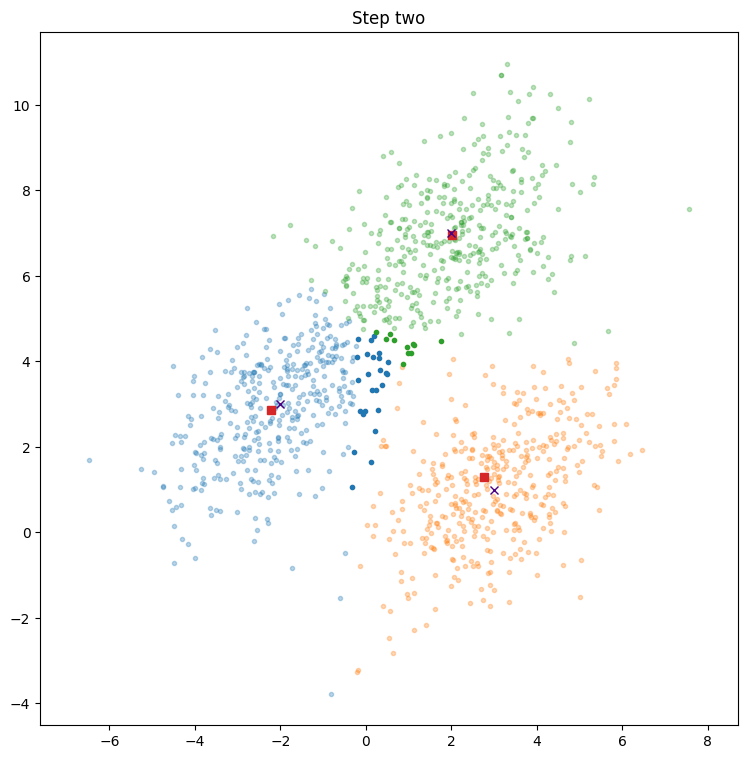

In [82]:
plt.figure(figsize=(9, 9))

plt.plot(group_a_2[:, 0], group_a_2[:, 1], '.', alpha=0.3)
plt.plot(group_b_2[:, 0], group_b_2[:, 1], '.', alpha=0.3)
plt.plot(group_c_2[:, 0], group_c_2[:, 1], '.', alpha=0.3)
plt.plot(centroids_3[:, 0], centroids_3[:, 1], 's')
plt.plot(centers[0], centers[1], 'x', color='indigo')


#plt.plot(xora1[:, 0], xora1[:, 1], '.', color='#ff7f0e')
plt.plot(xora2[:, 0], xora2[:, 1], '.', color='#1f77b4')
plt.plot(xora3[:, 0], xora3[:, 1], '.', color='#2ca02c')
#plt.plot(xora4[:, 0], xora4[:, 1], '.', color='#ff7f0e')

plt.title('Step two')
plt.axis('equal')